### ANÁLISIS CASO DE ESTUDIO
Se supone, por lo que dicen la mayoría de los Españoles, que en España se gana poco dinero.
Vamos a estudiar, con los datos de los salarios mundiales ("salary_data.csv") en que indice nos colocamos con respecto al mundo y europa.

Después, veremos el PIB por país, dato que nos permitirá conocer su poder económico, factor que se usa como argumento para debatir si los salarios deberían o no ser más elevados. Por ejemplo, cuando se habla de un país "rico", se hace referencia a su PIB ya que representa la "capacidad" económica. 

Pero, ¿realmente la capacidad económica de un país marca el salario medio que debería existir?

Primero de todo, importamos la librería pandas, que nos va a proporcionar las funciones para leer y ordenar los datos. También matplotlib para crear gráficas.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 8)

df_salarios = pd.read_csv("csv/salary_data.csv")
df_salarios

,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary
0,Afghanistan,Asia,Monthly,853.740000,1001.150000,252.530000,4460.970000
1,Aland Islands,Europe,Monthly,3319.240000,3858.350000,972.520000,17124.740000
2,Albania,Europe,Monthly,832.840000,956.920000,241.220000,4258.490000
3,Algeria,Africa,Monthly,1148.840000,1308.810000,330.110000,5824.180000
...,...,...,...,...,...,...,...
217,Western Sahara,Africa,Monthly,908.560000,1011.670000,254.860000,4503.890000
218,Yemen,Asia,Monthly,120.980000,133.360000,33.620000,594.930000
219,Zambia,Africa,Monthly,0.261335,0.285524,0.072092,1.271103
220,Zimbabwe,Africa,Monthly,555.402040,602.376350,151.423050,2674.772000


Creamos dos dataframes, uno para el mundo (df_salarios) y otro para los países Europeos. Seguido a esto, los ordenamos por salario medio y reindexamos para ver el nuevo ranking.

In [59]:
df_salarios_europa = df_salarios.loc[df_salarios.continent_name == "Europe"]
df_salarios_europa

,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary
1,Aland Islands,Europe,Monthly,3319.24,3858.35,972.52,17124.74
2,Albania,Europe,Monthly,832.84,956.92,241.22,4258.49
5,Andorra,Europe,Monthly,3668.08,4069.77,1120.51,17653.28
12,Austria,Europe,Monthly,3572.94,4016.91,1014.80,17864.69
...,...,...,...,...,...,...,...
191,Sweden,Europe,Monthly,3568.16,4144.56,1043.00,18389.75
192,Switzerland,Europe,Monthly,9836.07,11292.90,2850.27,50363.93
206,Ukraine,Europe,Monthly,530.73,622.80,157.32,2761.98
208,United Kingdom,Europe,Monthly,6300.00,7235.37,1829.27,32214.63


In [60]:
df_salarios = df_salarios.sort_values(by="average_salary", ascending=False).reset_index()
df_salarios_europa = df_salarios_europa.sort_values(by="average_salary", ascending=False).reset_index()

In [61]:
df_salarios.loc[df_salarios.country_name == "Spain"]

,index,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary
51,186,Spain,Europe,Monthly,2579.28,2875.26,877.38,12050.74


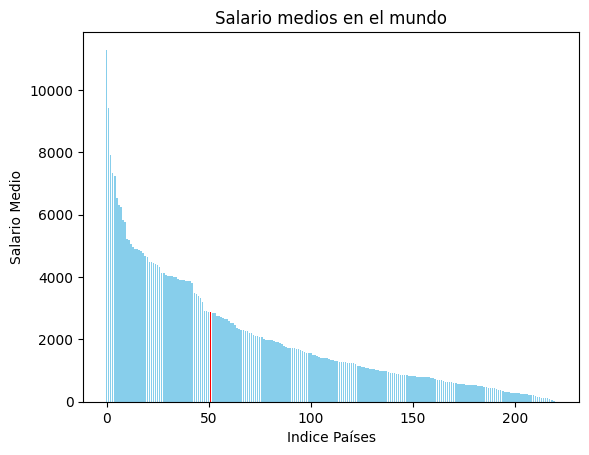

In [62]:
colors = ['red' if x == 'Spain' else 'skyblue' for x in df_salarios.country_name]

plt.bar(df_salarios.index, df_salarios.average_salary, color=colors) 
plt.xlabel('Indice Países') 
plt.ylabel('Salario Medio')  
plt.title('Salario medios en el mundo') 
plt.show() 

In [63]:
df_salarios_europa.loc[df_salarios_europa.country_name == "Spain"]

,index,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary
27,186,Spain,Europe,Monthly,2579.28,2875.26,877.38,12050.74


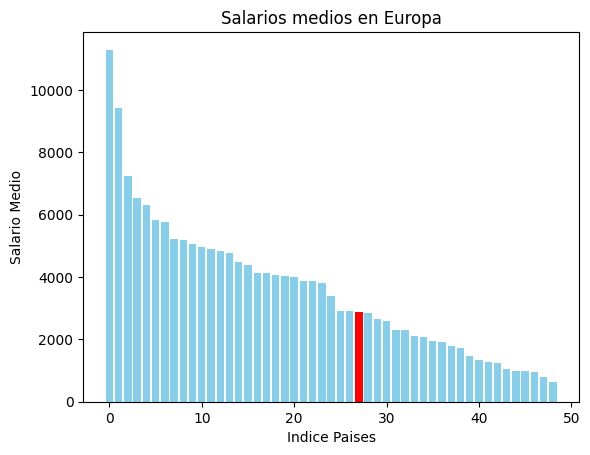

In [64]:
colors = ['red' if x == 'Spain' else 'skyblue' for x in df_salarios_europa.country_name]

plt.bar(df_salarios_europa.index, df_salarios_europa.average_salary, color=colors)
plt.xlabel('Indice Paises')  
plt.ylabel('Salario Medio')  
plt.title('Salarios medios en Europa') 
plt.show()

Podemos observar que España está en el ranking 51 mundial y 27 europeo de mejores salarios medios.
Ahora analicemos el PIB para ver en que ranking se sitúa España. Los datasets utilizados nos marcan como referencia el 2021, por lo que veremos el PIB mundial de 2021.

In [65]:
df_pib = pd.read_csv("csv/countries_gdp_hist.csv", delimiter=";")
df_pib_21 = df_pib.loc[df_pib.year == 2021]
df_pib_21

,country_code,region_name,sub_region_name,intermediate_region,country_name,income_group,year,total_gdp,total_gdp_million,gdp_variation
61,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,2021,3.126019e+09,3126.019399,17.172509
123,AFG,Asia,Southern Asia,no data,Afghanistan,Países de ingreso bajo,2021,1.478686e+10,14786.861638,-20.737146
185,AGO,Africa,Sub-Saharan Africa,Middle Africa,Angola,Países de ingreso mediano bajo,2021,6.740429e+10,67404.287260,1.100000
247,ALB,Europe,Southern Europe,no data,Albania,Ingreso mediano alto,2021,1.825579e+10,18255.787479,8.515501
...,...,...,...,...,...,...,...,...,...,...
13143,YEM,Asia,Western Asia,no data,Yemen,Países de ingreso bajo,2021,0.000000e+00,0.000000,0.000000
13205,ZAF,Africa,Sub-Saharan Africa,Southern Africa,South Africa,Ingreso mediano alto,2021,4.190150e+11,419015.018372,4.913097
13267,ZMB,Africa,Sub-Saharan Africa,Eastern Africa,Zambia,Países de ingreso bajo,2021,2.214763e+10,22147.634727,4.598734
13329,ZWE,Africa,Sub-Saharan Africa,Eastern Africa,Zimbabwe,Países de ingreso mediano bajo,2021,2.837124e+10,28371.238666,8.468017


Procedemos a hacer lo mismo que con los salarios, ordenamos los dos dataframes.

In [66]:
df_pib_21 = df_pib_21.sort_values(by="total_gdp", ascending=False).reset_index()
df_pib_21

,index,country_code,region_name,sub_region_name,intermediate_region,country_name,income_group,year,total_gdp,total_gdp_million,gdp_variation
0,12585,USA,Americas,Northern America,no data,United States of America,Ingreso alto,2021,2.331508e+13,2.331508e+07,5.945485
1,2231,CHN,Asia,Eastern Asia,no data,China,Ingreso mediano alto,2021,1.773406e+13,1.773406e+07,8.109793
2,6075,JPN,Asia,Eastern Asia,no data,Japan,Ingreso alto,2021,4.940878e+12,4.940878e+06,1.657071
3,3099,DEU,Europe,Western Europe,no data,Germany,Ingreso alto,2021,4.259935e+12,4.259935e+06,2.626987
...,...,...,...,...,...,...,...,...,...,...,...
211,11903,TKM,Asia,Central Asia,no data,Turkmenistan,Ingreso mediano alto,2021,0.000000e+00,0.000000e+00,0.000000
212,8245,MNP,Oceania,Micronesia,no data,Northern Mariana Islands,Ingreso alto,2021,0.000000e+00,0.000000e+00,0.000000
213,7377,MAF,Americas,Latin America and the Caribbean,Caribbean,Saint Martin (French part),Ingreso alto,2021,0.000000e+00,0.000000e+00,0.000000
214,4835,GRL,Americas,Northern America,no data,Greenland,Ingreso alto,2021,0.000000e+00,0.000000e+00,0.000000


In [67]:
df_pib_21_europe = df_pib_21.loc[df_pib_21.region_name == "Europe"].sort_values(by="total_gdp", ascending=False).reset_index()
df_pib_21_europe

,level_0,index,country_code,region_name,sub_region_name,intermediate_region,country_name,income_group,year,total_gdp,total_gdp_million,gdp_variation
0,3,3099,DEU,Europe,Western Europe,no data,Germany,Ingreso alto,2021,4.259935e+12,4.259935e+06,2.626987
1,5,4215,GBR,Europe,Northern Europe,no data,United Kingdom of Great Britain and Northern I...,Ingreso alto,2021,3.131378e+12,3.131378e+06,7.524910
2,6,3967,FRA,Europe,Western Europe,no data,France,Ingreso alto,2021,2.957880e+12,2.957880e+06,6.816589
3,7,5889,ITA,Europe,Southern Europe,no data,Italy,Ingreso alto,2021,2.107703e+12,2.107703e+06,6.737277
...,...,...,...,...,...,...,...,...,...,...,...,...
42,196,4401,GIB,Europe,Southern Europe,no data,Gibraltar,Ingreso alto,2021,0.000000e+00,0.000000e+00,0.000000
43,198,6943,LIE,Europe,Western Europe,no data,Liechtenstein,Ingreso alto,2021,0.000000e+00,0.000000e+00,0.000000
44,206,5455,IMN,Europe,Northern Europe,no data,Isle of Man,Ingreso alto,2021,0.000000e+00,0.000000e+00,0.000000
45,207,10787,SMR,Europe,Southern Europe,no data,San Marino,Ingreso alto,2021,0.000000e+00,0.000000e+00,0.000000


Obtenemos de nuevo los ranking y los mostramos en una gráfica.

In [68]:
df_pib_21.loc[df_pib_21.country_name == "Spain"]

,index,country_code,region_name,sub_region_name,intermediate_region,country_name,income_group,year,total_gdp,total_gdp_million,gdp_variation
13,3657,ESP,Europe,Southern Europe,no data,Spain,Ingreso alto,2021,1.427381e+12,1.427381e+06,5.519595


Paramos el analisis a 50 países para no distorsionar el gráfico.

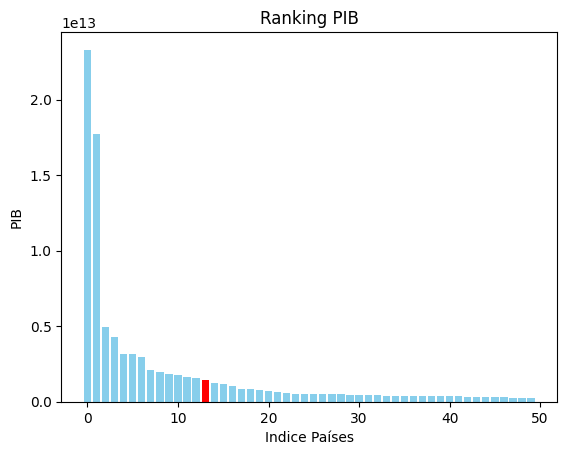

In [69]:
colors = ['red' if x == 'Spain' else 'skyblue' for x in df_pib_21.country_name[:50]] # BLOQUEAMOS A 50

plt.bar(df_pib_21.index[:50], df_pib_21.total_gdp[:50], color=colors)
plt.xlabel('Indice Países')
plt.ylabel('PIB')
plt.title('Ranking PIB')
plt.show() 

In [70]:
df_pib_21_europe.loc[df_pib_21_europe.country_name == "Spain"]

,level_0,index,country_code,region_name,sub_region_name,intermediate_region,country_name,income_group,year,total_gdp,total_gdp_million,gdp_variation
5,13,3657,ESP,Europe,Southern Europe,no data,Spain,Ingreso alto,2021,1.427381e+12,1.427381e+06,5.519595


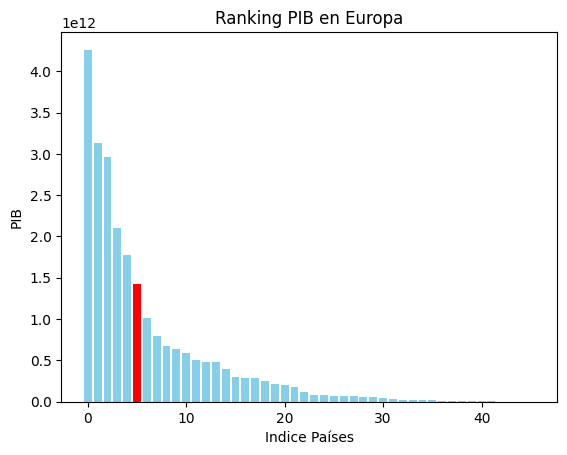

In [71]:
colors = ['red' if x == 'Spain' else 'skyblue' for x in df_pib_21_europe.country_name]

plt.bar(df_pib_21_europe.index, df_pib_21_europe.total_gdp, color=colors)
plt.xlabel('Indice Países')
plt.ylabel('PIB')
plt.title('Ranking PIB en Europa')
plt.show() 

Como podemos ver, en el mundo España se sitúa en el ranking 13 y en Europa el 5. Comparado con el ranking 51 y 27 respectivamente de los salarios medios.
Para poder sacar una conclusión, debemos obtener la población de cada país y asi poder dividir el PIB por habitante, dato que ayudará a hacer una comparativa más precisa.

In [72]:
df_poblacion = pd.read_csv("csv/world_population.csv")
df_poblacion

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25
233,74,ZWE,Zimbabwe,Harare,Africa,16320537,15669666,14154937,12839771,11834676,10113893,7049926,5202918,390757,41.7665,1.0204,0.20


Tenemos en cuenta la población de 2020, ya que será la mínima que hubo en 2021. Para poder mezclar los datos, usaremos el país como referencia. Cogemos un orden alphabetico para así poder hacer la comparativa.

In [73]:
merged_df_poblacion_pib = pd.merge(df_pib_21, df_poblacion, how='inner', left_on='country_name', right_on='Country/Territory')
merged_df_poblacion_pib

,index,country_code,region_name,sub_region_name,intermediate_region,country_name,income_group,year,total_gdp,total_gdp_million,...,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,2231,CHN,Asia,Eastern Asia,no data,China,Ingreso mediano alto,2021,1.773406e+13,1.773406e+07,...,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
1,6075,JPN,Asia,Eastern Asia,no data,Japan,Ingreso alto,2021,4.940878e+12,4.940878e+06,...,127250933,128105431,126803861,123686321,117624196,105416839,377930,327.9753,0.9947,1.55
2,3099,DEU,Europe,Western Europe,no data,Germany,Ingreso alto,2021,4.259935e+12,4.259935e+06,...,82073226,81325090,81551677,79370196,77786703,78294583,357114,233.4544,0.9995,1.05
3,5517,IND,Asia,Southern Asia,no data,India,Países de ingreso mediano bajo,2021,3.176295e+12,3.176295e+06,...,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,10973,SSD,Africa,Sub-Saharan Africa,Eastern Africa,South Sudan,Países de ingreso bajo,2021,0.000000e+00,0.000000e+00,...,11194299,9714419,6114440,4750817,4192011,3342410,619745,17.6091,1.0153,0.14
185,11903,TKM,Asia,Central Asia,no data,Turkmenistan,Ingreso mediano alto,2021,0.000000e+00,0.000000e+00,...,5766431,5267970,4569132,3720278,2862903,2201432,488100,13.1751,1.0140,0.08
186,8245,MNP,Oceania,Micronesia,no data,Northern Mariana Islands,Ingreso alto,2021,0.000000e+00,0.000000e+00,...,51514,54087,80338,48002,17613,10143,464,106.7909,1.0014,0.00
187,4835,GRL,Americas,Northern America,no data,Greenland,Ingreso alto,2021,0.000000e+00,0.000000e+00,...,55895,56351,56184,55599,50106,45434,2166086,0.0261,1.0040,0.00


Creamos ahora un nuevo dataframe que nos muestre solo las columnas que son de nuestro interés.

In [74]:
analisis_df_poblacion_pib = merged_df_poblacion_pib[['country_name', 'region_name', 'total_gdp', '2020 Population']]
analisis_df_poblacion_pib

,country_name,region_name,total_gdp,2020 Population
0,China,Asia,1.773406e+13,1424929781
1,Japan,Asia,4.940878e+12,125244761
2,Germany,Europe,4.259935e+12,83328988
3,India,Asia,3.176295e+12,1396387127
...,...,...,...,...
184,South Sudan,Africa,0.000000e+00,10606227
185,Turkmenistan,Asia,0.000000e+00,6250438
186,Northern Mariana Islands,Oceania,0.000000e+00,49587
187,Greenland,Americas,0.000000e+00,56026


In [75]:
analisis_df_poblacion_pib = analisis_df_poblacion_pib.copy()
analisis_df_poblacion_pib["GDP per hab."] = analisis_df_poblacion_pib["total_gdp"] / analisis_df_poblacion_pib["2020 Population"]
analisis_df_poblacion_pib

,country_name,region_name,total_gdp,2020 Population,GDP per hab.
0,China,Asia,1.773406e+13,1424929781,12445.569516
1,Japan,Asia,4.940878e+12,125244761,39449.776113
2,Germany,Europe,4.259935e+12,83328988,51121.884641
3,India,Asia,3.176295e+12,1396387127,2274.652211
...,...,...,...,...,...
184,South Sudan,Africa,0.000000e+00,10606227,0.000000
185,Turkmenistan,Asia,0.000000e+00,6250438,0.000000
186,Northern Mariana Islands,Oceania,0.000000e+00,49587,0.000000
187,Greenland,Americas,0.000000e+00,56026,0.000000


Hacemos el mismo procedimiento que en las anteriores etapas.

In [78]:
analisis_df_poblacion_pib = analisis_df_poblacion_pib.sort_values(by="GDP per hab.", ascending=False).reset_index()
analisis_df_poblacion_pib.loc[analisis_df_poblacion_pib.country_name == "Spain"]

,index,country_name,region_name,total_gdp,2020 Population,GDP per hab.
32,9,Spain,Europe,1.427381e+12,47363807,30136.527693


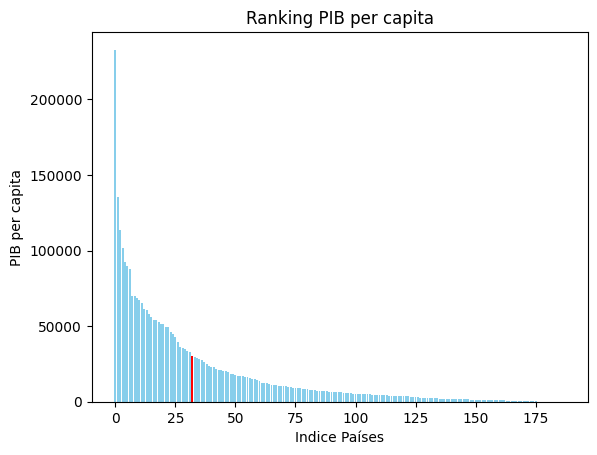

In [80]:
colors = ['red' if x == 'Spain' else 'skyblue' for x in analisis_df_poblacion_pib.country_name]

plt.bar(analisis_df_poblacion_pib.index, analisis_df_poblacion_pib["GDP per hab."], color=colors)
plt.xlabel('Indice Países')
plt.ylabel('PIB per capita')
plt.title('Ranking PIB per capita')
plt.show() 

In [77]:
analisis_df_poblacion_pib_europe = analisis_df_poblacion_pib.loc[analisis_df_poblacion_pib.region_name == "Europe"].sort_values(by="GDP per hab.", ascending=False).reset_index()
analisis_df_poblacion_pib_europe.loc[analisis_df_poblacion_pib_europe.country_name == "Spain"]

,index,country_name,region_name,total_gdp,2020 Population,GDP per hab.
18,9,Spain,Europe,1.427381e+12,47363807,30136.527693


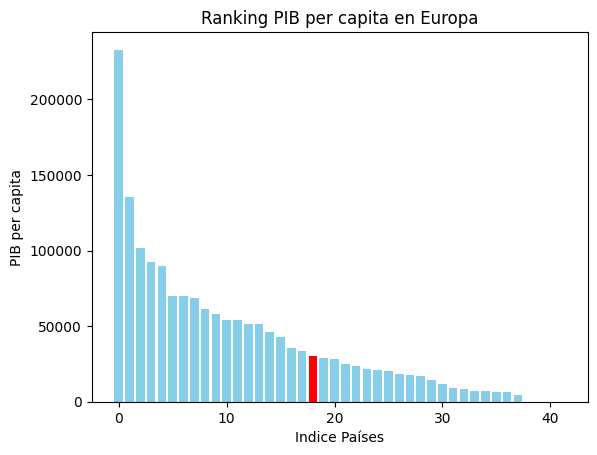

In [81]:
colors = ['red' if x == 'Spain' else 'skyblue' for x in analisis_df_poblacion_pib_europe.country_name]

plt.bar(analisis_df_poblacion_pib_europe.index, analisis_df_poblacion_pib_europe["GDP per hab."], color=colors)
plt.xlabel('Indice Países')
plt.ylabel('PIB per capita')
plt.title('Ranking PIB per capita en Europa')
plt.show()

España se sitúa en el ranking 32 mundial y 18 europeo en pib per capita.

Vemos como España varía en el ranking según que parámetro tengamos en cuenta. Si hablamos de salarios, nos situamos entre el 51 mundial y el 27 europeo. En cambio, tanto por PIB total y per capita, nos situamos entre [13, 32] mundial y [5, 18] europeo.

España está mejor situada económicamente por PIB que por sus salarios, no obstante, para que podamos basarnos en la economía Española para poder deducir si los salarios son bajos, faltaría argumentar la relación del PIB con los salarios de los habitantes de un país. Comparamos ahora esos ratios para solo las países Europeos.

In [113]:
df_salarios_pib = pd.merge(df_salarios_europa, analisis_df_poblacion_pib_europe, how='inner', left_on='country_name', right_on='country_name')
df_salarios_pib = df_salarios_pib[["continent_name", "country_name", "average_salary", "GDP per hab."]]
df_salarios_pib = df_salarios_pib.copy() # Para evitar el error que salta
df_salarios_pib["ratio"] = round((df_salarios_pib["GDP per hab."]/(df_salarios_pib.average_salary*12)), 2)
df_salarios_pib = df_salarios_pib.sort_values(by="average_salary", ascending=False)
df_salarios_pib

,continent_name,country_name,average_salary,GDP per hab.,ratio
0,Europe,Switzerland,11292.90000,92681.563046,0.68
1,Europe,Belgium,6522.20000,51385.462690,0.66
2,Europe,Liechtenstein,5825.14000,0.000000,0.00
3,Europe,Denmark,5779.04000,68370.720538,0.99
...,...,...,...,...,...
36,Europe,Lithuania,997.90189,23559.917052,1.97
37,Europe,Belarus,983.28000,7079.844454,0.60
38,Europe,Albania,956.92000,6367.892930,0.55
39,Europe,Ukraine,622.80000,4556.753808,0.61


Se ha ordenado los paises por su salario medio de forma descendente, por lo tanto para que la relación del PIB per capita y el salario medio tenga una relación deberiamos ver una forma lineal.

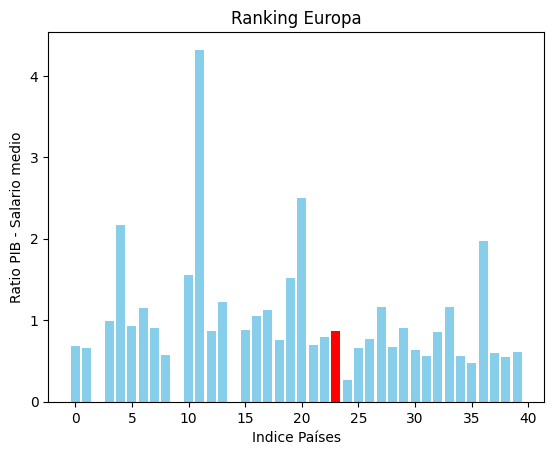

In [114]:
colors = ['red' if x == 'Spain' else 'skyblue' for x in df_salarios_pib.country_name]

plt.bar(df_salarios_pib.index, df_salarios_pib.ratio, color=colors)
plt.xlabel('Indice Países')
plt.ylabel('Ratio PIB - Salario medio')
plt.title('Ranking Europa')
plt.show()

Como observamos, no existe una relación entre el salario y el PIB de un país.

#### Conclusión

En definitiva, existe una variación entre el posicionamiento mundial de España con respecto al PIB y los salarios, pero como hemos visto, el ratio indica que no existe una correlación entre ambos parámetros. 

Por lo tanto, la economía de un país no establece los salarios que tiene dicho estado y dependerá de otros factores que no son sujeto de este análisis. Para la persona que piense que el crecimiento o caída de la economía Española conllevará a peores o mejores salarios medios, según el análisis, no será por ese motivo. 

Pero, quiero destacar que nunca es bueno que la economía de un país caiga, como el famoso ejemplo de Venezuela.